In [2]:
import numpy as np


def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)



class NeuralNetwork:
    def __init__(self, x, y):
        dimension = 2
        self.input        = x
        self.weights1     = np.random.rand(dimension, x.shape[1])
        self.weights2     = np.random.rand(1,dimension)
        self.bias1        = np.random.rand(dimension,1)
        self.bias2        = np.random.rand(1,1)
        self.y            = y
        self.output       = np.zeros(self.y.shape)
        self.activation   = sigmoid
        self.d_activation = sigmoid_derivative
        self.learning_rate = 0.1

    def feedforward(self,x):
        self.x = np.expand_dims(x,axis =1)
        self.layer1 = self.activation(self.weights1 @  self.x + self.bias1)
        self.output = self.activation(self.weights2 @ self.layer1 + self.bias2)

    def call(self,x):
        x = np.expand_dims(x,axis =1)
        layer1 = self.activation(self.weights1 @  x + self.bias1)
        output = self.activation(self.weights2 @ layer1 + self.bias2)
        return output

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights1 = np.zeros(self.weights1.shape)
        d_weights2 = np.zeros(self.weights2.shape)
        d_bias1    = np.zeros(self.bias1.shape)
        d_bias2    = np.zeros(self.bias2.shape)

        for j in range(4):
          # compute gradient per each input image
          single_input = self.input[j]
          self.feedforward(single_input)

          error = self.output - self.y[j]
          delta_output = error * self.d_activation(self.output)

          hidden_error = self.weights2.T @ delta_output
          delta_hidden = hidden_error * self.d_activation(self.layer1)


          d_weights2 += delta_output @ self.layer1.T
          d_bias2    += delta_output
          d_weights1 += delta_hidden @ self.x.T
          d_bias1    += delta_hidden

        self.weights1 -= d_weights1
        self.weights2 -= d_weights2
        self.bias1    -= d_bias1
        self.bias2    -= d_bias2


X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([[0],[1],[1],[0]])

nn = NeuralNetwork(X,y)

for i in range(10000):
    nn.backprop()
for j in range(4):
    nn.feedforward(X[j])
    print('Prediction:\n', nn.x, ' --->' , nn.output)


Prediction:
 [[0]
 [0]]  ---> [[0.01302265]]
Prediction:
 [[0]
 [1]]  ---> [[0.98887704]]
Prediction:
 [[1]
 [0]]  ---> [[0.98886945]]
Prediction:
 [[1]
 [1]]  ---> [[0.01144388]]


<ipython-input-3-de269875ceb3>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fun_map_2[i,j] = nn.call([mu[i], gamma[j]])


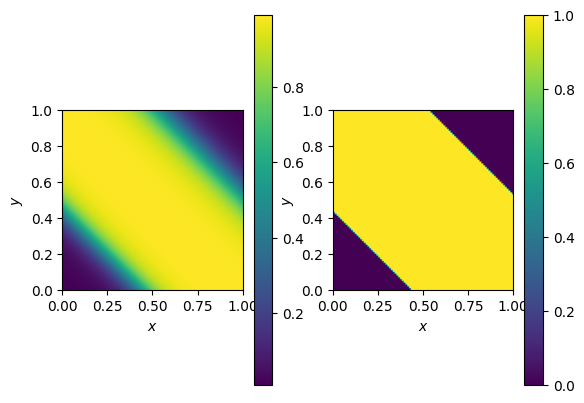

In [3]:
import matplotlib.pyplot as plt

mu = np.linspace(0,1,100)
gamma = np.linspace(0,1,100)

# filling the heatmap, value by value
fun_map = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        net_val = nn.call([mu[i], gamma[j]])
        if net_val>0.5:
          fun_map[i,j] = 1
        else:
          fun_map[i,j] = 0

fun_map_2 = np.empty((mu.size, gamma.size))
for i in range(mu.size):
    for j in range(gamma.size):
        fun_map_2[i,j] = nn.call([mu[i], gamma[j]])

fig = plt.figure()
s = fig.add_subplot(1, 2, 1, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map_2,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)
s = fig.add_subplot(1, 2, 2, xlabel='$x$', ylabel='$y$')
im = s.imshow(
    fun_map,
    extent=(gamma[0], gamma[-1], mu[0], mu[-1]),
    origin='lower')
fig.colorbar(im)
